<center>
    <h1><b> Dummy Variables & One Hot Encoding </b></h1>
    ----------------------------------------------
</center>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [28]:
data = {'town':['monroe township', 'monroe township', 'monroe township', 'monroe township', 'monroe township',
               'west windsor', 'west windsor', 'west windsor', 'west windsor',  'robbinsville',
               'robbinsville', 'robbinsville', 'robbinsville'],
       'area': [2600, 3000, 3200, 3600, 4000, 2600, 2800, 3300, 3600, 2600, 2900, 3100, 3600],
       'price': [550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000, 710000, 575000, 600000, 620000, 695000]}

In [30]:
df = pd.DataFrame(data)

In [31]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robbinsville,2600,575000


In [33]:
# changies values in town column to dummy variables
dummies = pd.get_dummies(df['town']).astype(int)
dummies

,monroe township,robbinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [34]:
df1 = pd.concat([df, dummies], axis = 'columns')

In [35]:
df1

,town,area,price,monroe township,robbinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robbinsville,2600,575000,0,1,0


In [36]:
# dropping thw town column
df2 = df1.drop(columns='town', axis = 1)

In [37]:
df2

,area,price,monroe township,robbinsville,west windsor
0,2600,550000,1,0,0
1,3000,565000,1,0,0
2,3200,610000,1,0,0
3,3600,680000,1,0,0
4,4000,725000,1,0,0
5,2600,585000,0,0,1
6,2800,615000,0,0,1
7,3300,650000,0,0,1
8,3600,710000,0,0,1
9,2600,575000,0,1,0


In [38]:
# dropping one of the dummy variables to avoid multicolinearity
df3 = df2.drop(columns = 'west windsor', axis = 1)
df3

,area,price,monroe township,robbinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [39]:
X = df3.drop('price', axis = 1)
y = df3['price']
X, y

(    area  monroe township  robbinsville
 0   2600                1             0
 1   3000                1             0
 2   3200                1             0
 3   3600                1             0
 4   4000                1             0
 5   2600                0             0
 6   2800                0             0
 7   3300                0             0
 8   3600                0             0
 9   2600                0             1
 10  2900                0             1
 11  3100                0             1
 12  3600                0             1,
 0     550000
 1     565000
 2     610000
 3     680000
 4     725000
 5     585000
 6     615000
 7     650000
 8     710000
 9     575000
 10    600000
 11    620000
 12    695000
 Name: price, dtype: int64)

In [41]:
# creating model class object
model = LinearRegression()

In [42]:
model.fit(X, y)   

LinearRegression()

In [46]:
model.predict([[2800, 0, 1]])

C:\Users\Banji\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [48]:
model.predict([[3400, 0, 0]])

C:\Users\Banji\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.66845839])

### Model Evaluation

In [51]:
evaluation = model.score(X,y) 

print(f" The model accuracy is: {(evaluation * 100).round(2)}%")

 The model accuracy is: 95.74%


### Saving Model

In [55]:
import pickle as pk

In [56]:
# saving model as pickle file
with open('model_dummy_rent_pickle', 'wb') as file:
    pk.dump(model, file)

In [57]:
# to load a saved model
with open('model_dummy_rent_pickle', 'rb') as file:
    model_d = pk.load(file)

In [58]:
model_d.predict([[7000, 1, 0]])

C:\Users\Banji\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1098058.4820468])

# SK Learn One Hot Encoder

In [59]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robbinsville,2600,575000


In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [61]:
dfle = df.copy()

In [62]:
dfle['town'] = le.fit_transform(dfle['town'])
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [65]:
X = dfle[['town', 'area']].values
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [67]:
y = dfle['price']
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [72]:
# To create dummy variable, one hot encoder module will be imported
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

col_transformer = ColumnTransformer(transformers = [
    ('cat', OneHotEncoder(), [0])
], remainder = 'passthrough')  # [0] means that the first column in the dataframe is the categorical variable


In [77]:
X_transform = col_transformer.fit_transform(X)
X_transform

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [78]:
# Dropping the first column from the X_transform
X_transform_col = X_transform[:, 1:]
X_transform_col

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [79]:
modell = LinearRegression()

In [80]:
modell.fit(X_transform_col, y)

LinearRegression()

In [82]:
# Evaluation
eval = modell.score(X_transform_col, y) 

print(f" The model accuracy is: {(eval * 100).round(2)}%")

 The model accuracy is: 95.74%


In [81]:
modell.predict([[1, 0, 2800]])

array([590775.63964739])

In [88]:
modell.predict([[0, 1, 3400]])

array([681241.6684584])

In [86]:
import pickle as pk

with open('modell_rent_pk', 'wb') as fl:
    pk.dump(modell, fl)

## Exercise

- predict price of a mercedez benz that is 4 yrs old with mileage 45000
- predict price of a BMW X5 that is 7 yrs old with mileage 86000
- Tell me the score(accuracy) of your model. Hint: use LinearRegression().score())

In [93]:
dat = {'car_model':['BMW X5', 'BMW X5', 'BMW X5', 'BMW X5', 'BMW X5', 'Audi A5', 'Audi A5', 'Audi A5', 'Audi A5', 'Mercedez', 'Mercedez', 'Mercedez', 'Mercedez'],
      'mileage': [69000, 35000, 57000, 22500, 46000, 59000, 52000, 72000, 91000, 67000, 83000, 79000, 59000],
      'sell_price': [18000, 34000, 26100, 40000, 31500, 29400, 32000, 19300, 12000, 22000, 20000, 21000, 33000],
      'age': [6, 3, 5, 2, 4, 5, 5, 6, 8, 6, 7, 7, 5]}

In [94]:
df_car = pd.DataFrame(dat)

In [95]:
df_car

,car_model,mileage,sell_price,age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez,67000,22000,6


In [96]:
# plotting the columns in the dataframe to reveal relationships
import seaborn as sb

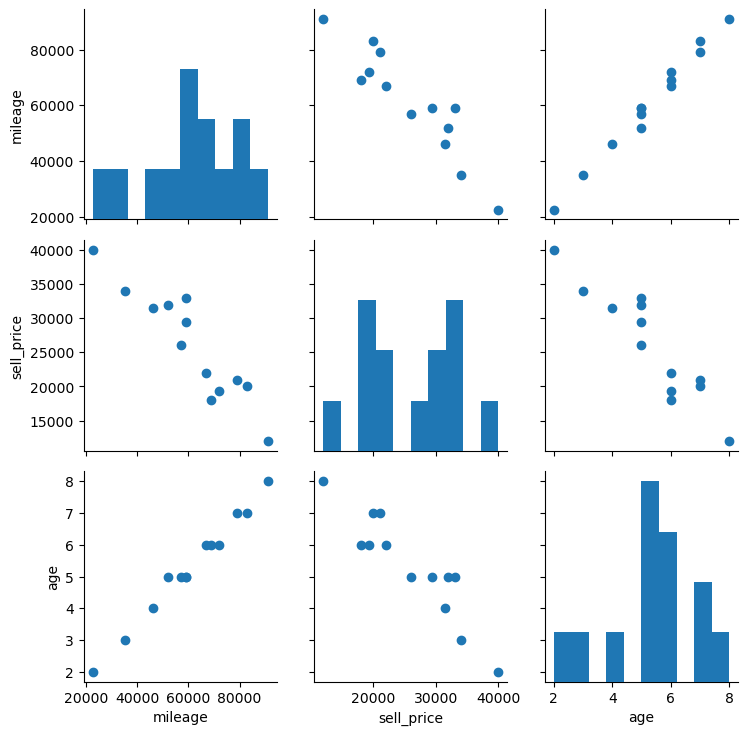

In [97]:
# Pairwise visualization
pairwise = sb.PairGrid(data = df_car, vars = ['mileage', 'sell_price', 'age'])
pairwise = pairwise.map_diag(plt.hist, bins = 10)
pairwise.map_offdiag(plt.scatter);

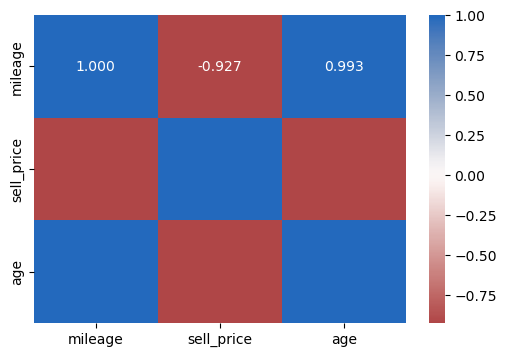

In [102]:
# Heatmap chart to show correlation coefficient of numeric variables
num_cols = ['mileage', 'sell_price', 'age']

plt.figure(figsize = [6, 4])
sb.heatmap(df_car[num_cols].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0);

### Dummy Variables Method

In [100]:
# changies values in car_model column to dummy variables
car_dum_df = pd.get_dummies(df_car['car_model']).astype(int)
car_dum_df

,Audi A5,BMW X5,Mercedez
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [105]:
car_dum_df1 = pd.concat([df_car, car_dum_df], axis = 1)

In [106]:
car_dum_df1

,car_model,mileage,sell_price,age,Audi A5,BMW X5,Mercedez
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez,67000,22000,6,0,0,1


In [108]:
car_dum_df2 = car_dum_df1.drop(columns = ['car_model', 'Mercedez'], axis = 1)
car_dum_df2

,mileage,sell_price,age,Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [109]:
from sklearn.linear_model import LinearRegression

In [110]:
X1 = car_dum_df2.drop('sell_price', axis = 1)
y1 = car_dum_df2['sell_price']

In [112]:
model2 = LinearRegression()

In [113]:
model2.fit(X1, y1)

LinearRegression()

In [118]:
# Evaluation
eval2 = model2.score(X1, y1)
print(f' The accuracy is: {(eval2 * 100).round(2)}')

 The accuracy is: 94.17


- predict price of a mercedez benz that is 4 yrs old with mileage 45000
- predict price of a BMW X5 that is 7 yrs old with mileage 86000
- Tell me the score(accuracy) of your model. Hint: use LinearRegression().score())

In [123]:
model2.predict([[45000, 4, 0, 0]]).round(2)

C:\Users\Banji\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.32])

In [124]:
model2.predict([[86000, 7, 0, 1]]).round(2)

C:\Users\Banji\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74])

In [125]:
import pickle as pk

with open('car_price_model', 'wb') as fil:
    pk.dump(model2, fil)

## One Hot Encoding Method

In [126]:
df_car

,car_model,mileage,sell_price,age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez,67000,22000,6


In [127]:
from sklearn.preprocessing import LabelEncoder

lab = LabelEncoder()

In [128]:
df_car_lab = df_car.copy()

In [129]:
df_car_lab['car_model'] = lab.fit_transform(df_car_lab['car_model'])

In [131]:
df_car_lab

,car_model,mileage,sell_price,age
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [133]:
X2 = df_car_lab[['car_model', 'mileage', 'age']].values

In [134]:
y2 = df_car_lab['sell_price']

In [136]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

col_transform = ColumnTransformer(transformers = [('category', OneHotEncoder(), [0])],
                                 remainder = 'passthrough')

In [138]:
X_trans = col_transform.fit_transform(X2)
X_trans

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [139]:
X_trans = X_trans[:, 1:]

In [140]:
X_trans

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [141]:
model3 = LinearRegression()

In [142]:
model3.fit(X_trans, y2)

LinearRegression()

In [144]:
# evaluation
evaluatn = model3.score(X_trans, y2)
print(f'The accuracy score is:{(evaluatn * 100).round(2)}%')

The accuracy score is:94.17%


- predict price of a mercedez benz that is 4 yrs old with mileage 45000
- predict price of a BMW X5 that is 7 yrs old with mileage 86000
- Tell me the score(accuracy) of your model. Hint: use LinearRegression().score())

In [151]:
print(f'The prediction for the Benz is: {model3.predict([[0, 1, 45000, 4]]).round(2)}')

The prediction for the Benz is: [36991.32]


In [150]:
print(f'The prediction for BMW X5 is: {model3.predict([[1, 0, 86000, 7]]).round(2)}')

The prediction for BMW X5 is: [11080.74]
